# 4.9: Intro to Data Visualization with Python

In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Creating a path
path = r'C:\Users\zwier\anaconda_projects\15-01-2025 Instacart Basket Analysis'

In [5]:
# importing df
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge4.8.pkl'))

In [6]:
# Checking df
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,busiest_day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_frequency,order_frequency_flag
0,1107.0,38259.0,2.0,1.0,11.0,7.0,1.0,7.0,0.0,Chocolate Sandwich Cookies,...,both,Regularly busy,Busiest days,Most orders,5.0,New customer,7.163333,Low spender,7.0,Frequent customer
1,5319.0,196224.0,65.0,1.0,14.0,1.0,1.0,3.0,1.0,Chocolate Sandwich Cookies,...,both,Regularly busy,Busiest days,Most orders,100.0,Loyal customer,5.342729,Low spender,1.0,Frequent customer
2,7540.0,138499.0,8.0,0.0,14.0,7.0,1.0,4.0,1.0,Chocolate Sandwich Cookies,...,both,Busiest day,Busiest days,Most orders,24.0,Regular customer,7.469540,Low spender,7.0,Frequent customer
3,9228.0,79603.0,2.0,2.0,10.0,30.0,1.0,2.0,0.0,Chocolate Sandwich Cookies,...,both,Regularly busy,Regularly busy,Most orders,6.0,New customer,6.986207,Low spender,28.0,Non-frequent customer
4,9273.0,50005.0,1.0,1.0,15.0,0.0,1.0,30.0,0.0,Chocolate Sandwich Cookies,...,both,Regularly busy,Busiest days,Most orders,23.0,Regular customer,7.493154,Low spender,7.0,Frequent customer


# Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

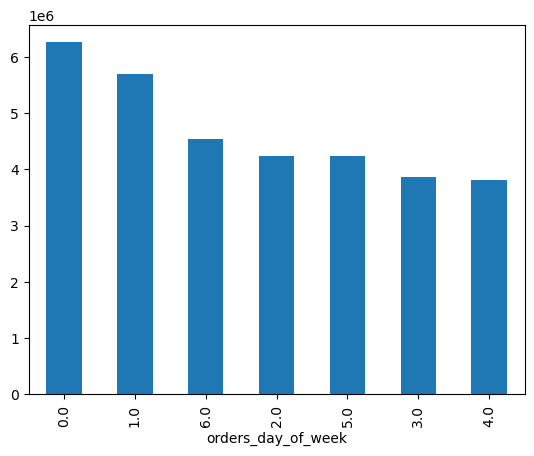

In [8]:
# Bar chart (default sort is largest to smallest)
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

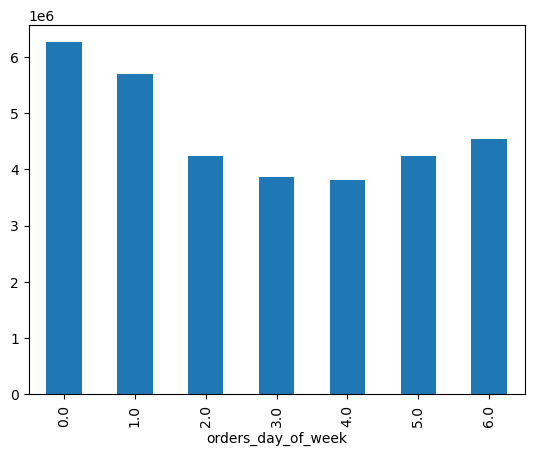

In [9]:
# Sorted by Index (0-6) Bar chart
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [10]:
# Sorted by Index (0-6) 
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0.0    6252941
1.0    5696724
2.0    4243173
3.0    3868747
4.0    3812390
5.0    4236989
6.0    4530304
Name: count, dtype: int64

In [11]:
# default sort is largest to smallest)
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0.0    6252941
1.0    5696724
6.0    4530304
2.0    4243173
5.0    4236989
3.0    3868747
4.0    3812390
Name: count, dtype: int64

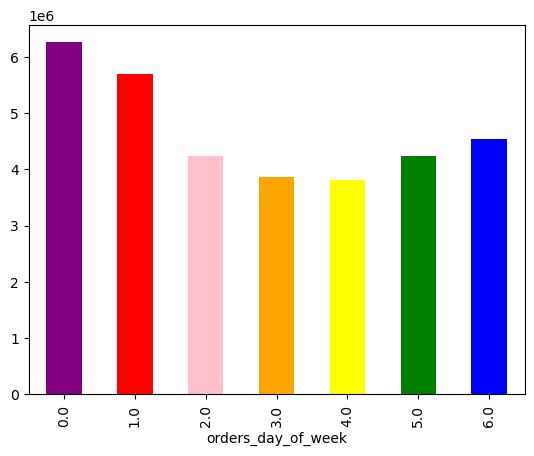

In [44]:
# Creating a Bar chart and adding Colors to the bar chart
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Exporting Charts

In [14]:
# Checking bar object
# bar.figure

In [15]:
# Exporting/Saving bar as aimage file
# bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

### Histograms

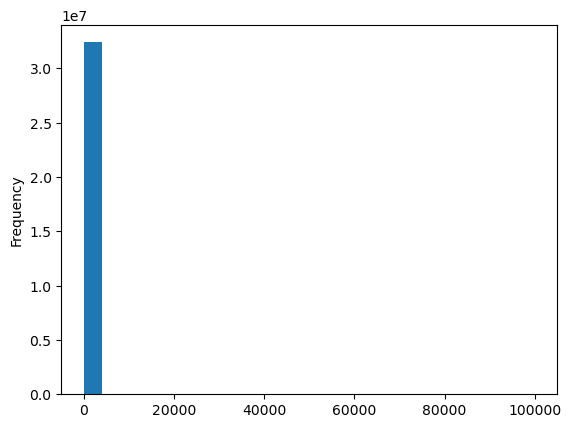

In [48]:
h1 = ords_prods_merge['prices'].plot.hist(bins = 25) # Creating h1 histogram
# h1.figure # Checking figure
# h1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'h1.png')) # Exporting h1 figure to an image

#### Something is super wrong

In [20]:
# Exporting/Saving Histogram as aimage file
# bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [21]:
# Lets check the max
ords_prods_merge['prices'].describe().round(2)

count    32404870.00
mean           11.98
std           495.66
min             1.00
25%             4.20
50%             7.40
75%            11.30
max         99999.00
Name: prices, dtype: float64

In [22]:
# Lets dort with 'prices' index largest to smallest)
ords_prods_merge['prices'].value_counts().sort_index(ascending=False).round(2)

prices
99999.0       698
14900.0      4429
25.0        13772
24.9         5781
24.8          410
            ...  
1.4        392209
1.3        425691
1.2        256258
1.1        242782
1.0        115143
Name: count, Length: 242, dtype: int64

### Scatterplot
#### Scatterplots are created by way of the scatterplot() function, which is included in the seaborn library (imported into your notebook as sns).

In [24]:
# sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

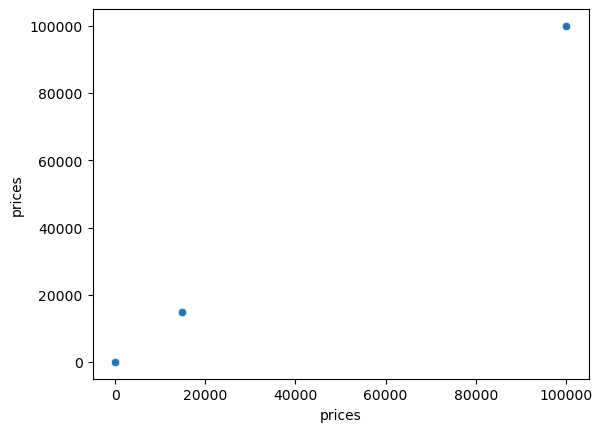

In [50]:
s1 = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge) # Creating s1 histogram
# s1.figure # Checking figure
# s1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 's1.png')) # Exporting s1 figure to an image

In [58]:
# Lets check for outliers > 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, ['order_id', 'product_name', 'prices']] \
    .sort_values(by='prices', ascending=False) \
    .round(2)

,order_id,product_name,prices
21817068,3421047.0,2 % Reduced Fat Milk,99999.0
21816600,1050901.0,2 % Reduced Fat Milk,99999.0
21816608,1095121.0,2 % Reduced Fat Milk,99999.0
21816607,1078636.0,2 % Reduced Fat Milk,99999.0
21816606,1077441.0,2 % Reduced Fat Milk,99999.0
...,...,...,...
13131990,1326429.0,Lowfat 2% Milkfat Cottage Cheese,14900.0
13131989,1325786.0,Lowfat 2% Milkfat Cottage Cheese,14900.0
13131988,1325472.0,Lowfat 2% Milkfat Cottage Cheese,14900.0
13131987,1324517.0,Lowfat 2% Milkfat Cottage Cheese,14900.0


In [60]:
# Lets change those those 100+ to Nan
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [62]:
# checking results looking for column max - amount higher than 100 should not exist now
ords_prods_merge['prices'].max()

25.0

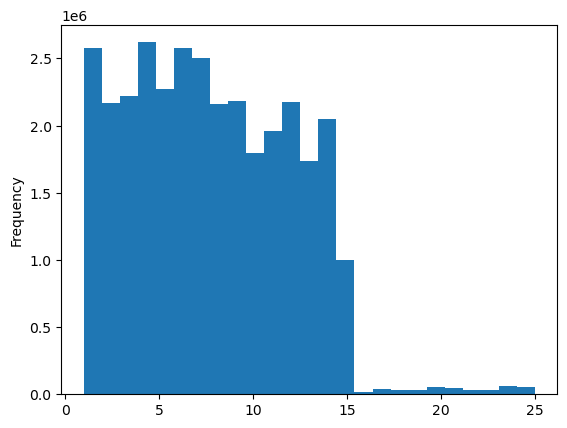

In [64]:
# cheking updated histogram after adhoc cleaning
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

In [74]:
# hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist.png')) # Exporting hist figure to an image

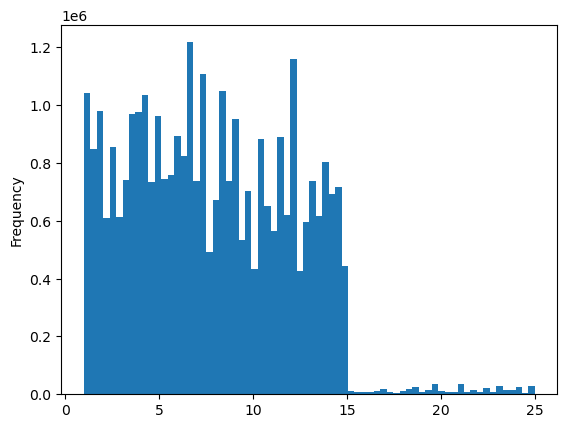

In [68]:
# cheking updated histogram after adhoc cleaning 70 bins 
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [72]:
# hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_2.png')) # Exporting hist_2 figure to an image

# Creating Line Charts

# Sampling Data

In [79]:
# Create a list holding True/False values to the test 70/30 split
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [83]:
# that stores our boolean values 
dev

array([False,  True, False, ...,  True,  True,  True])

In [87]:
# example
np.random.rand(10)

array([0.43335341, 0.22798136, 0.06987349, 0.0479021 , 0.2242669 ,
       0.13182308, 0.20326324, 0.75321347, 0.94710635, 0.50484646])

In [93]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [95]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [101]:
# Checking lines
len(ords_prods_merge)

32641279

In [103]:
# Checking lines
len(big)+len(small)

32641279

In [105]:
# lets reduce dataframe to have only colums that we need
df_2 = small[['orders_day_of_week','prices']]

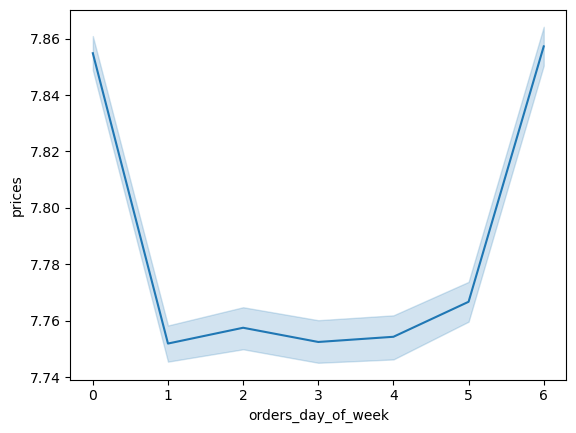

In [107]:
# GO with the chart
# line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [111]:
# Exporting line figure to an image
# line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line.png'))

In [115]:
# lets reduce dataframe to have only colums that we need BIG
df_3 = big[['orders_day_of_week','prices']]

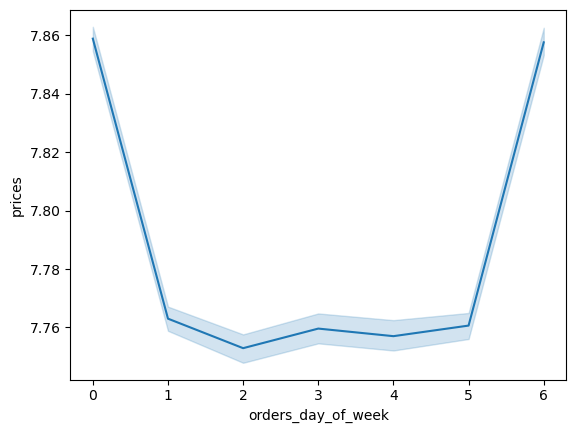

In [119]:
# GO with the chart BIG
# line2 = sns.lineplot(data = df_3, x = 'orders_day_of_week',y = 'prices')

In [121]:
# Exporting line figure to an image
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line2.png'))